In [189]:
import os
import json
from pprint import pprint

# List to hold the data from all JSON files
all_json_data = {}

# Get the current directory
current_directory = os.getcwd()
res_dir = current_directory + '/result'

# Loop through all files in the current directory
for filename in os.listdir(res_dir):
    if filename.endswith('.json'):
        # if filename.startswith('.'):
            # continue
        file_path = os.path.join(res_dir, filename)
        
        # Open and read the JSON file
        with open(file_path, 'r') as file:
            try:
                json_data = json.load(file)

                label = filename.split('.')[0]
                if len(label) == 0:
                    continue

                all_json_data[label] = json_data
            except json.JSONDecodeError as e:
                print(f"Error reading {filename}: {e}")

# Now, all_json_data contains the contents of all JSON files
pprint(all_json_data.keys())


dict_keys(['anthropic_resonator_spec_success_cases', 'llama_resonator_spec_success_cases', 'gemini_drag_success_cases', 'openai_drag_failure_cases', 'gemini_resonator_spec_failure_cases', 'anthropic_drag_success_cases', 'llama_drag_success_cases', 'openai_resonator_spec_success_cases', 'llama_gmm_success_cases', 'openai_gmm_failure_cases', 'openai_rabi_failure_cases', 'gemini_gmm_success_cases', 'gemini_rabi_success_cases', 'llama_rabi_success_cases', 'anthropic_gmm_failure_cases', 'anthropic_rabi_success_cases', 'llama_gmm_failure_cases', 'openai_gmm_success_cases', 'anthropic_gmm_success_cases', 'anthropic_rabi_failure_cases', 'llama_rabi_failure_cases', 'gemini_rabi_failure_cases', 'openai_rabi_success_cases', 'gemini_gmm_failure_cases', 'llama_resonator_spec_failure_cases', 'anthropic_resonator_spec_failure_cases', 'openai_resonator_spec_failure_cases', 'llama_drag_failure_cases', 'anthropic_drag_failure_cases', 'openai_drag_success_cases', 'gemini_resonator_spec_success_cases', 'g

In [190]:
all_json_data.keys()

dict_keys(['anthropic_resonator_spec_success_cases', 'llama_resonator_spec_success_cases', 'gemini_drag_success_cases', 'openai_drag_failure_cases', 'gemini_resonator_spec_failure_cases', 'anthropic_drag_success_cases', 'llama_drag_success_cases', 'openai_resonator_spec_success_cases', 'llama_gmm_success_cases', 'openai_gmm_failure_cases', 'openai_rabi_failure_cases', 'gemini_gmm_success_cases', 'gemini_rabi_success_cases', 'llama_rabi_success_cases', 'anthropic_gmm_failure_cases', 'anthropic_rabi_success_cases', 'llama_gmm_failure_cases', 'openai_gmm_success_cases', 'anthropic_gmm_success_cases', 'anthropic_rabi_failure_cases', 'llama_rabi_failure_cases', 'gemini_rabi_failure_cases', 'openai_rabi_success_cases', 'gemini_gmm_failure_cases', 'llama_resonator_spec_failure_cases', 'anthropic_resonator_spec_failure_cases', 'openai_resonator_spec_failure_cases', 'llama_drag_failure_cases', 'anthropic_drag_failure_cases', 'openai_drag_success_cases', 'gemini_resonator_spec_success_cases', 'g

In [191]:
import pandas as pd

In [192]:
entries = []

def summarize_statistics(data):

    entries = []
    for key,val in data.items():
        data = {
            'model_type':key
        }
        data.update(val)
        entries.append(data)

    return entries

for case,data in all_json_data.items():
    model = case.split('_')[0]
    case = '_'.join(case.split('_')[1:-1])
    for _, report in data.items():
        for inspection_type, results in report.items():
            entry = {}
            entry['inspection_type']=inspection_type
            entry['case'] = case
            entry['model'] = model
            for r in summarize_statistics(results):
                r.update(entry)
                entries.append(r)

In [193]:
print(entries[0].keys())

dict_keys(['model_type', 'analysis', 'success', 'inspection_type', 'case', 'model'])


In [194]:
df = pd.DataFrame(entries)

In [195]:
df

,model_type,analysis,success,inspection_type,case,model,recommended_action,recommendation
0,full,The resonator spectroscopy experiment was succ...,True,image_zero_shot,resonator_spec_success,anthropic,NaN,NaN
1,fitting_only,The fitting results suggest the presence of a ...,None,image_zero_shot,resonator_spec_success,anthropic,NaN,NaN
2,visual_only,The resonator spectroscopy magnitude plot exhi...,True,image_zero_shot,resonator_spec_success,anthropic,NaN,NaN
3,full,The resonator spectroscopy experiment was succ...,True,image_few_shot,resonator_spec_success,anthropic,NaN,NaN
4,fitting_only,The fitting results suggest the presence of a ...,True,image_few_shot,resonator_spec_success,anthropic,NaN,NaN
...,...,...,...,...,...,...,...,...
3205,fitting_only,The DRAG calibration experiment was unsuccessf...,False,image_zero_shot,drag_failure,gemini,NaN,NaN
3206,visual_only,The DRAG calibration experiment successfully i...,True,image_zero_shot,drag_failure,gemini,NaN,NaN
3207,full,The DRAG coefficient calibration experiment fa...,False,image_few_shot,drag_failure,gemini,NaN,NaN
3208,fitting_only,The DRAG calibration experiment was successful...,True,image_few_shot,drag_failure,gemini,NaN,NaN


In [196]:
mask = df['case'].str.contains('success')
df['target_output'] = mask
df['ai_output'] = df['success']
df['success'] = (df['ai_output'] == df['target_output'])
# for all entry whose model_type is "fitting_only", set its "inspection" to "fitting"
#df.loc[df['model_type'] == 'fitting_only', 'inspection_type'] = 'fitting'

# if the model_type is "fitting_only", set its "run_type" to "fitting"
df.loc[df['model_type'] == 'fitting_only', 'run_type'] = 'fitting_only'
# if the model_type is "full", set its "run_type" to be "full"+"inspection_type"
df.loc[df['model_type'] == 'full', 'run_type'] = 'full_' + df['inspection_type']
# if the model_type is "visual_only", set its "run_type" to be "visual"+"inspection_type"
df.loc[df['model_type'] == 'visual_only', 'run_type'] = 'visual_only_' + df['inspection_type']



In [197]:
# get the ratio of True in "full success"
# group by the value of "case"
df.groupby(['model', 'run_type'])['success'].mean()

model      run_type                   
anthropic  fitting_only                   0.537037
           full_image_few_shot            0.903704
           full_image_zero_shot           0.629630
           visual_only_image_few_shot     0.881481
           visual_only_image_zero_shot    0.496296
gemini     fitting_only                   0.587500
           full_image_few_shot            0.837500
           full_image_zero_shot           0.818750
           visual_only_image_few_shot     0.875000
           visual_only_image_zero_shot    0.787500
llama      fitting_only                   0.618750
           full_image_zero_shot           0.575000
           visual_only_image_zero_shot    0.487500
openai     fitting_only                   0.543750
           full_image_few_shot            0.906250
           full_image_zero_shot           0.818750
           visual_only_image_few_shot     0.968750
           visual_only_image_zero_shot    0.800000
Name: success, dtype: float64

In [198]:

map_model_to_plot_name = {
    "openai": "GPT-4o",
    "anthropic" : "Claude-3-Opus",
    "llama": "Llama-3-70B+Llava-v1.6-34B",
    "gemini": "Gemini-1.5-Pro"
}

map_run_type_to_plot_name = {
    "fitting_only": "Fitting only",
    "full_image_few_shot": "Combined (few shot)",
    "full_image_zero_shot": "Combined (zero shot)",
    "visual_only_image_few_shot": "Visual (few shot)",
    "visual_only_image_zero_shot": "Visual (zero shot)",
}


# map the model name to the plot name
df['model_plot_name'] = df['model'].map(map_model_to_plot_name)
df['run_type_plot_name'] = df['run_type'].map(map_run_type_to_plot_name)


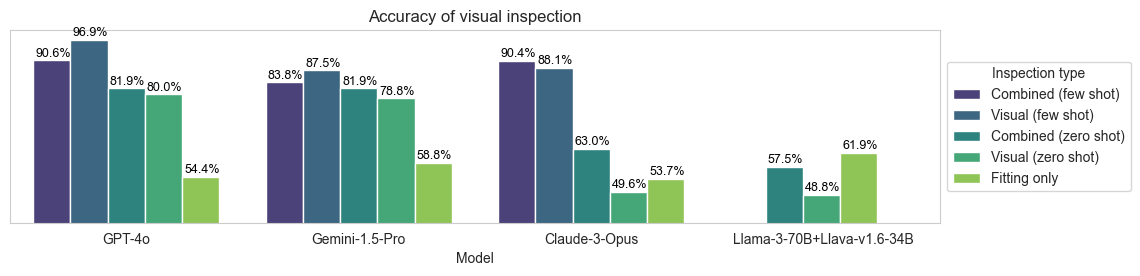

In [199]:
# draw a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

model_order = ["openai", "gemini", "anthropic", "llama"]
model_order = [map_model_to_plot_name[o] for o in model_order]
run_type_order = ["full_image_few_shot", "visual_only_image_few_shot", "full_image_zero_shot", "visual_only_image_zero_shot", "fitting_only"]
run_type_order = [map_run_type_to_plot_name[o] for o in run_type_order]


sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(12, 2.5))
sns.barplot(x='model_plot_name', y='success', hue='run_type_plot_name', data=df, errorbar=None, order=model_order, hue_order=run_type_order, palette='viridis')
# remove the y label and axis
plt.ylabel('')
plt.yticks([])

# Set the y axis start from 0.5
plt.ylim(0.4, 1.0)

plt.xlabel('Model')

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Inspection type')

plt.title('Accuracy of visual inspection')

for bar in plt.gca().patches:
    current_x = bar.get_x()
    if current_x > 2.5:
        bar.set_x(current_x - 0.17)
    
# Add the number on the top of the bar
# Use the font family of 'Comic Sans MS'
for p in plt.gca().patches:
    if p.get_height() == 0.0:
        continue
    plt.gca().annotate(f"{p.get_height()*100:.1f}%", (p.get_x() + p.get_width() / 2. + 0.005, p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points', fontfamily='sans-serif')

# Save the plot
plt.savefig('inspection_benchmark_summary.pdf', bbox_inches='tight', dpi=300)
plt.show()